In [30]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit import QuantumCircuit
from IPython.display import Image
from math import sqrt, pi

# Magic State QC

## What are Magic States?

Magic states are special types of quantum states that, when available, provide a way to implement universal quantum computation even when we can only directly perform a restricted set of quantum operations. The idea here is that if you can just produce certain non-stabilizer states like $$
\begin{aligned}
\frac{1}{\sqrt{2}}\left(|0\rangle+e^{i\frac{\pi}{4}}|1\rangle\right)
\end{aligned}
$$ (so-called “magic states”), then by applying certain stabilizer operations to those states and performing measurements (adapting your procedure as necessary based on the outcome of the measurements), you can simulate the effect of applying non-stabilizer gates.

## The Need for Magic States

The physical realization of quantum computers often comes with restrictions on the types of quantum gates we can execute directly. This is due to the complexities associated with controlling quantum systems. For example, many physical systems natively support only a limited set of quantum gates, often known as a universal gate set, which is insufficient to perform any arbitrary quantum computation. However, if we can prepare certain special states (magic states), we can leverage them to perform a wider range of operations. This can be achieved using a technique known as "gate synthesis" or "magic state distillation."

## Magic State Distillation

Magic state distillation is a procedure to convert a number of imperfect copies of a magic state into fewer, more perfect copies. The idea is to start with "noisy" magic states (states that are close to, but not exactly, magic states) and process them to create a smaller number of higher-fidelity magic states.

This process uses quantum error detection techniques and involves repeatedly encoding, measuring, and possibly discarding copies of the state until a state of satisfactory quality is obtained.

## The Role of Magic States in Quantum Computation

One of the fundamental applications of magic states is in fault-tolerant quantum computation. In this paradigm, magic states provide a way to implement error-protected logical quantum gates, which are necessary to perform meaningful quantum computations in the presence of noise. Furthermore, magic states can make a quantum computation more efficient by providing a way to perform certain complex quantum operations directly, instead of synthesizing them using a large number of simpler operations.

## An Example

For the image below, try finding what gate can be used to implement the gate marked as S. That operator give the desired output state T|ψ⟩ for the two possible measurement values 0,1 of the upper qubit? Take input as:
$$\begin{aligned}
|\chi\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle+e^{i \frac{\pi}{4}}|1\rangle\right)
\end{aligned}$$
This state is also known as the magic state. The solution is shown below.

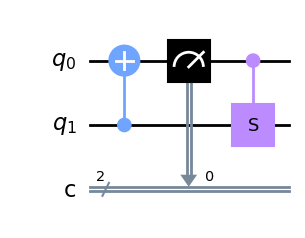

In [31]:
from qiskit.circuit.library.standard_gates import SGate

qc = QuantumCircuit(2,2)
qc.cx(1,0)
qc.measure(0,0)

c_s_gate = SGate().control(1)
qc.append(c_s_gate, [0, 1])

qc.draw('mpl')

First, we define our states:

$$
\begin{aligned}
& |\psi\rangle=\alpha|0\rangle+\beta|1\rangle
\end{aligned}
$$

Then, we form a superposition of these states:

$$
\begin{aligned}
|\psi \oplus \chi\rangle=C_{10} \frac{1}{\sqrt{2}}\left[\alpha|00\rangle+\alpha e^{i \theta}|01\rangle\right. & +\beta|11\rangle \ +\beta e^{i \pi / 4}|10\rangle
\end{aligned}
$$

We then find that this is equivalent to:

$$
\begin{aligned} & =\frac{1}{2}\left[\left(\alpha|0\rangle+\beta e^{i \frac{\pi}{4}}|1\rangle\right)|0\rangle\right. +\left.  \left(\alpha e^{i \pi / 4}|0\rangle+\beta|1\rangle\right)|1\rangle\right]\end{aligned} 
$$

Thus, when $|0\rangle$ is measured, $\alpha|0\rangle+\beta e^{i \frac{\pi}{4}}|1\rangle$ is the resultant value. When $|1\rangle$ is measured, $\alpha e^{i \pi / 4} |0\rangle + \beta|1\rangle$ is the resultant state. So, we can apply a swap gate to get to the same state as $|0\rangle$.


As another example, given access to a state of the form
$$
\begin{aligned}
& |\theta\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle+e^{i \theta}|1\rangle\right) \\
\end{aligned}
$$
it's also possible to implement the phase shift operator
$$
\begin{aligned} & A_\theta=\left[\begin{array}{ll}1 & 0 \\ 0 & e^{i \theta} \end{array}\right] 
\end{aligned}
$$
using controlled phase-shift operators, hadamard gates, and CX gates.

## Conclusion

Magic states are a powerful tool in quantum information processing, offering a way to implement universal quantum computation even under constraints on the quantum operations we can perform directly. As we continue to build and improve quantum computers, techniques like magic state distillation will be increasingly important in overcoming the challenges of quantum error correction and fault tolerance.